In [33]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx

In [25]:
df = pd.read_csv("sensor-location.csv", sep=';')

df[['latitude', 'longitude']] = df['Lat/Long'].str.split(',', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df.head()

,Objectummer,Locatienaam,Lat/Long,Breedte,Effectieve breedte,latitude,longitude
0,CMSA-GAKH-01,Kalverstraat t.h.v. 1,"52.372634, 4.892071",8,"6,7",52.372634,4.892071
1,CMSA-GAWW-11,Korte Niezel,"52.374616, 4.899830","3,8","3,4",52.374616,4.899830
2,CMSA-GAWW-12,Oudekennissteeg,"52.373860, 4.898690",3,"2,6",52.373860,4.898690
3,CMSA-GAWW-13,Stoofsteeg,"52.372439, 4.897689","2,6","2,2",52.372439,4.897689
4,CMSA-GAWW-14,Oudezijds Voorburgwal t.h.v. 91,"52.373538, 4.898166",4,"3,6",52.373538,4.898166


In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

,Objectummer,Locatienaam,Lat/Long,Breedte,Effectieve breedte,latitude,longitude,geometry
0,CMSA-GAKH-01,Kalverstraat t.h.v. 1,"52.372634, 4.892071",8,"6,7",52.372634,4.892071,POINT (4.89207 52.37263)
1,CMSA-GAWW-11,Korte Niezel,"52.374616, 4.899830","3,8","3,4",52.374616,4.899830,POINT (4.89983 52.37462)
2,CMSA-GAWW-12,Oudekennissteeg,"52.373860, 4.898690",3,"2,6",52.373860,4.898690,POINT (4.89869 52.37386)
3,CMSA-GAWW-13,Stoofsteeg,"52.372439, 4.897689","2,6","2,2",52.372439,4.897689,POINT (4.89769 52.37244)
4,CMSA-GAWW-14,Oudezijds Voorburgwal t.h.v. 91,"52.373538, 4.898166",4,"3,6",52.373538,4.898166,POINT (4.89817 52.37354)


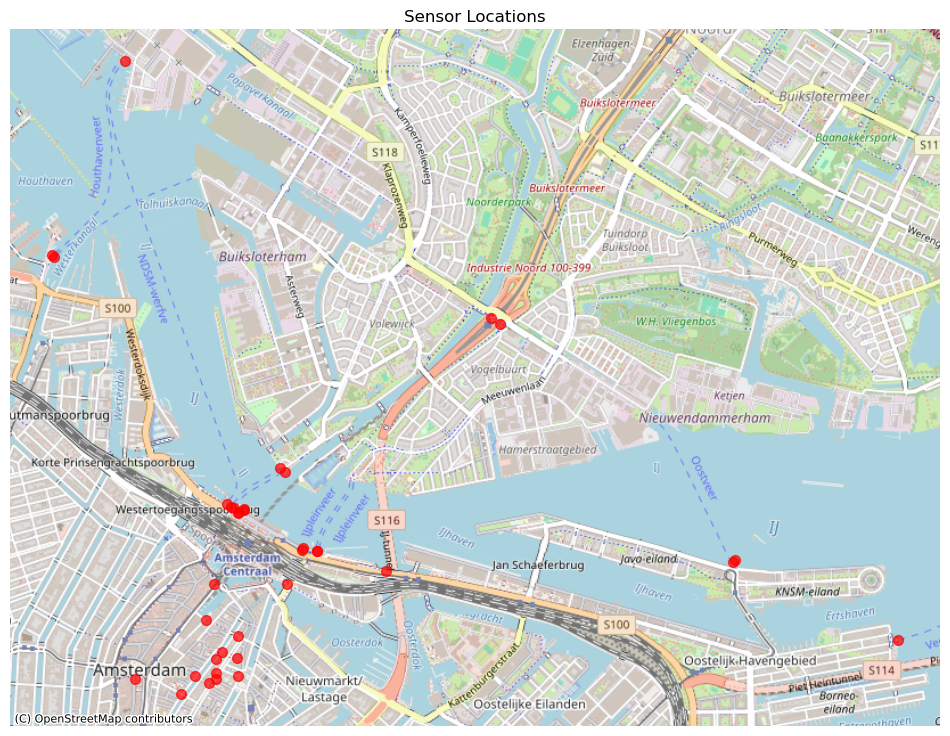

In [45]:
city = "Amsterdam, Netherlands"
gdf_city = ox.geocode_to_gdf(city).to_crs(epsg=3857)

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(ax=ax, color='red', markersize=50, alpha=0.7)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title("Sensor Locations")

plt.savefig(
    "sensormap.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0
)

plt.show()